In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder , RobustScaler
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.drop('Route',axis=1,inplace=True)

In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

Data Cleaning

In [11]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0
Price,0


In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(pd.DataFrame({ 'Missing Percentage (%)': missing_percentage}))

                 Missing Percentage (%)
Airline                        0.000000
Date_of_Journey                0.000000
Source                         0.000000
Destination                    0.000000
Dep_Time                       0.000000
Arrival_Time                   0.000000
Duration                       0.000000
Total_Stops                    0.009361
Additional_Info                0.000000
Price                          0.000000


In [13]:
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)

<ipython-input-13-9449f8a10e80>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)


In [14]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0
Price,0


In [16]:
df.shape

(10683, 10)

In [17]:
df.duplicated().sum()

220

In [18]:

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [19]:
df.shape

(10463, 10)

### Exploratory Data Analysis(EDA)
Univariate Analysis

In [20]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1695
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [22]:
px.histogram(data_frame=df , x = "Airline")

In [23]:
df['Date_of_Journey'].value_counts()

,count
Date_of_Journey,
6/06/2019,490
18/05/2019,486
9/06/2019,485
12/06/2019,483
21/05/2019,482
9/05/2019,466
21/03/2019,412
15/05/2019,402
27/05/2019,369


In [24]:
df['Source'].value_counts()

,count
Source,
Delhi,4346
Kolkata,2860
Banglore,2179
Mumbai,697
Chennai,381


In [25]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4346
Banglore,2860
Delhi,1265
New Delhi,914
Hyderabad,697
Kolkata,381


In [26]:
df['Dep_Time'].value_counts()

,count
Dep_Time,
18:55,233
17:00,227
07:05,202
07:10,201
10:00,196
...,...
22:25,1
16:25,1
21:35,1


In [27]:
df['Arrival_Time'].value_counts()

,count
Arrival_Time,
19:00,412
21:00,360
19:15,333
16:10,154
12:35,122
...,...
00:50 04 May,1
00:50 02 Jun,1
00:25 02 Jun,1


In [28]:
df['Duration'].value_counts()

,count
Duration,
2h 50m,544
1h 30m,386
2h 45m,335
2h 55m,332
2h 35m,329
...,...
30h 25m,1
30h 15m,1
42h 5m,1


In [29]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5626
non-stop,3475
2 stops,1318
3 stops,43
4 stops,1


In [30]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8183
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [31]:
df.drop('Additional_Info',axis=1,inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [32]:
df['Price'].value_counts()

,count
Price,
10262,258
10844,212
7229,161
4804,160
4823,131
...,...
8925,1
11774,1
16497,1


In [33]:
pd.options.display.float_format = '{:.2f}'.format
df['Price'].describe()

,Price
count,10463.00
mean,9026.64
std,4624.65
min,1759.00
25%,5224.00
50%,8266.00
75%,12343.50
max,79512.00


In [34]:
px.histogram(data_frame=df , x ="Price")

In [35]:
px.box(data_frame=df , x ="Price")

In [36]:
df[df["Price"] == df["Price"].max()]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,05:45,11:25,5h 40m,1 stop,79512


Dealing with Outliers

In [37]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Price'] = np.where(
    (df['Price'] < lower_bound) | (df['Price'] > upper_bound),
    df['Price'].median(),
    df['Price']
)


In [38]:
px.histogram(data_frame=df , x ="Price")

In [39]:
px.box(data_frame=df , x ="Price")

Bivariate Analysis

<Axes: xlabel='Airline', ylabel='Price'>

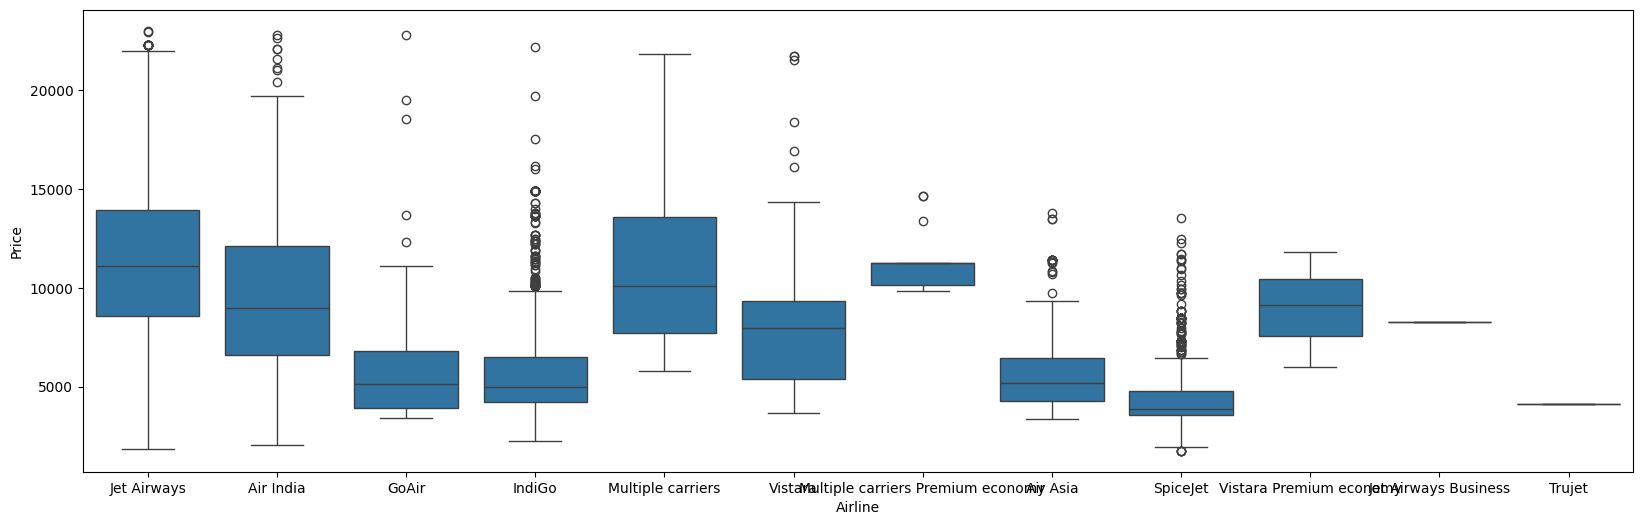

In [40]:
plt.figure(figsize=(20,6))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Total_Stops', ylabel='Price'>

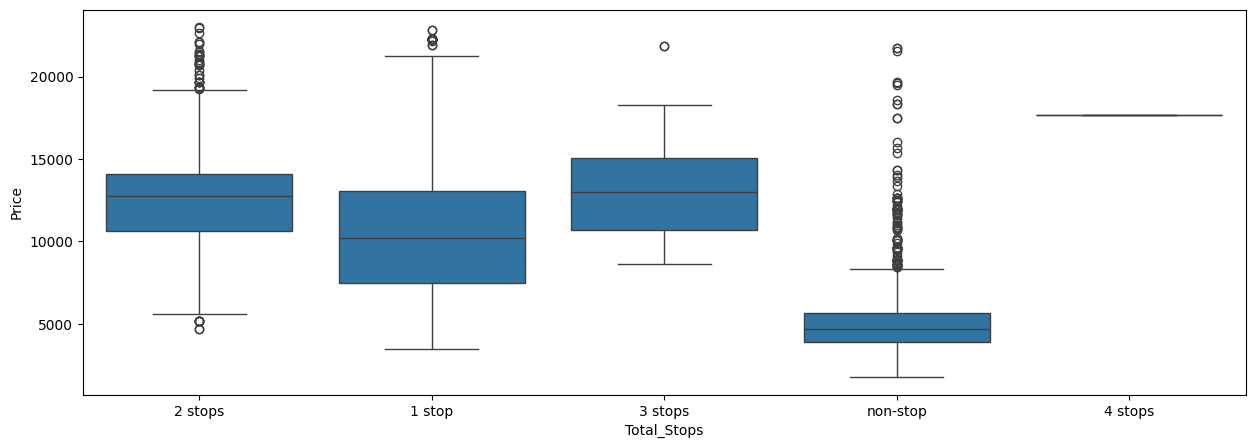

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Source', ylabel='Price'>

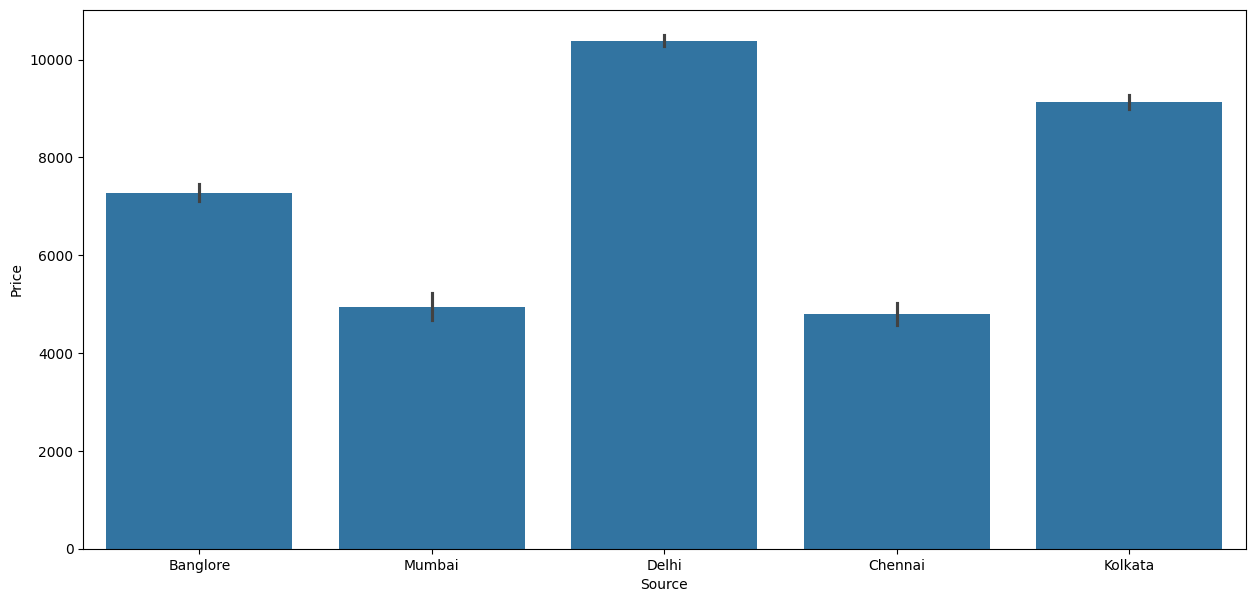

In [42]:
plt.figure(figsize=(15,7))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))

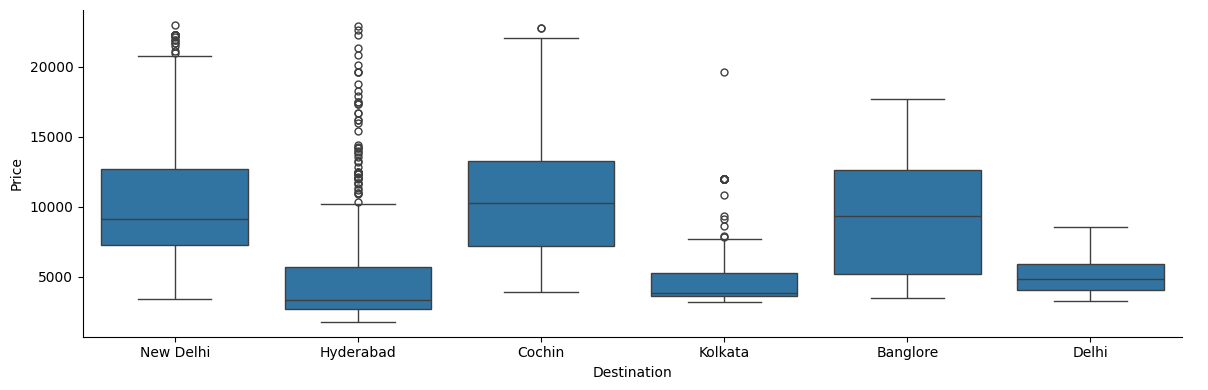

In [43]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

### Feature Engineering

In [44]:
df['Journey_Day']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
df['Journey_Month']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897.00,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662.00,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882.00,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218.00,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302.00,1,3


In [45]:
df['Dep_Hours']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minutes']=pd.to_datetime(df['Dep_Time']).dt.minute
df.head()

<ipython-input-45-2d8803dac407>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-45-2d8803dac407>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897.00,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662.00,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882.00,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218.00,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302.00,1,3,16,50


In [46]:
df['Arrival_Hours']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minutes']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.head()

<ipython-input-46-e517289384b5>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-46-e517289384b5>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897.00,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662.00,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882.00,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218.00,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302.00,1,3,16,50,21,35


In [47]:
df['Duration_Hours'] = df['Duration'].str.extract(r'(\d+)h').astype(float)
df['Duration_Minutes'] = df['Duration'].str.extract(r'(\d+)m').fillna(0).astype(float)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897.00,24,3,22,20,1,10,2.00,50.00
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662.00,1,5,5,50,13,15,7.00,25.00
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882.00,9,6,9,25,4,25,19.00,0.00
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218.00,12,5,18,5,23,30,5.00,25.00
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302.00,1,3,16,50,21,35,4.00,45.00


In [48]:
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897.00,24,3,22,20,1,10,2.00,50.00
1,Air India,Kolkata,Banglore,2 stops,7662.00,1,5,5,50,13,15,7.00,25.00
2,Jet Airways,Delhi,Cochin,2 stops,13882.00,9,6,9,25,4,25,19.00,0.00
3,IndiGo,Kolkata,Banglore,1 stop,6218.00,12,5,18,5,23,30,5.00,25.00
4,IndiGo,Banglore,New Delhi,1 stop,13302.00,1,3,16,50,21,35,4.00,45.00


In [49]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Hours', 'Dep_Minutes',
       'Arrival_Hours', 'Arrival_Minutes', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

In [50]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Total_Stops,object
Price,float64
Journey_Day,int32
Journey_Month,int32
Dep_Hours,int32
Dep_Minutes,int32
Arrival_Hours,int32


Is the plane arriving time before its departure time?

In [51]:
invalid_times = df[(df['Arrival_Hours'] < df['Dep_Hours']) |
                   ((df['Arrival_Hours'] == df['Dep_Hours']) & (df['Arrival_Minutes'] < df['Dep_Minutes']))]

print({len(invalid_times)})


{3123}


In [52]:
df['Total_Duration_Minutes'] = df['Duration_Hours'] * 60 + df['Duration_Minutes']
df['Arrival_Day_Adjusted'] = df['Journey_Day'] + (df['Dep_Minutes'] + df['Total_Duration_Minutes']) // (24 * 60)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes,Total_Duration_Minutes,Arrival_Day_Adjusted
0,IndiGo,Banglore,New Delhi,non-stop,3897.00,24,3,22,20,1,10,2.00,50.00,170.00,24.00
1,Air India,Kolkata,Banglore,2 stops,7662.00,1,5,5,50,13,15,7.00,25.00,445.00,1.00
2,Jet Airways,Delhi,Cochin,2 stops,13882.00,9,6,9,25,4,25,19.00,0.00,1140.00,9.00
3,IndiGo,Kolkata,Banglore,1 stop,6218.00,12,5,18,5,23,30,5.00,25.00,325.00,12.00
4,IndiGo,Banglore,New Delhi,1 stop,13302.00,1,3,16,50,21,35,4.00,45.00,285.00,1.00


In [53]:
invalid_times = df[(df['Arrival_Hours'] < df['Dep_Hours']) & (df['Arrival_Day_Adjusted'] == df['Journey_Day'])]

df.loc[df['Arrival_Hours'] < df['Dep_Hours'], 'Arrival_Day_Adjusted'] += 1

invalid_times_after_fix = df[(df['Arrival_Hours'] < df['Dep_Hours']) & (df['Arrival_Day_Adjusted'] == df['Journey_Day'])]

print("before :",{len(invalid_times)})
print("after :",{len(invalid_times_after_fix)})

before : {2954}
after : {0}


In [54]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes,Total_Duration_Minutes,Arrival_Day_Adjusted
0,IndiGo,Banglore,New Delhi,non-stop,3897.00,24,3,22,20,1,10,2.00,50.00,170.00,25.00
1,Air India,Kolkata,Banglore,2 stops,7662.00,1,5,5,50,13,15,7.00,25.00,445.00,1.00
2,Jet Airways,Delhi,Cochin,2 stops,13882.00,9,6,9,25,4,25,19.00,0.00,1140.00,10.00
3,IndiGo,Kolkata,Banglore,1 stop,6218.00,12,5,18,5,23,30,5.00,25.00,325.00,12.00
4,IndiGo,Banglore,New Delhi,1 stop,13302.00,1,3,16,50,21,35,4.00,45.00,285.00,1.00


In [55]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Hours', 'Dep_Minutes',
       'Arrival_Hours', 'Arrival_Minutes', 'Duration_Hours',
       'Duration_Minutes', 'Total_Duration_Minutes', 'Arrival_Day_Adjusted'],
      dtype='object')

In [56]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Total_Stops,object
Price,float64
Journey_Day,int32
Journey_Month,int32
Dep_Hours,int32
Dep_Minutes,int32
Arrival_Hours,int32


Handling Categorical Data

In [57]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

<ipython-input-57-e025af3e1ae6>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [58]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes,Total_Duration_Minutes,Arrival_Day_Adjusted
0,IndiGo,Banglore,New Delhi,0,3897.00,24,3,22,20,1,10,2.00,50.00,170.00,25.00
1,Air India,Kolkata,Banglore,2,7662.00,1,5,5,50,13,15,7.00,25.00,445.00,1.00
2,Jet Airways,Delhi,Cochin,2,13882.00,9,6,9,25,4,25,19.00,0.00,1140.00,10.00
3,IndiGo,Kolkata,Banglore,1,6218.00,12,5,18,5,23,30,5.00,25.00,325.00,12.00
4,IndiGo,Banglore,New Delhi,1,13302.00,1,3,16,50,21,35,4.00,45.00,285.00,1.00


In [59]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Total_Stops,int64
Price,float64
Journey_Day,int32
Journey_Month,int32
Dep_Hours,int32
Dep_Minutes,int32
Arrival_Hours,int32


In [60]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
Num_Columns = x.select_dtypes(include="number").columns.tolist()
Cat_Columns = x.select_dtypes(include="object_").columns.tolist()

In [63]:
Num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [64]:
Cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [65]:
Transformer = ColumnTransformer(
    transformers=[
        ('num', Num_transformer, Num_Columns),
        ('cat', Cat_transformer,Cat_Columns)
    ]
)

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# افترض أن لديك models جاهزة للتكرار
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
}

# افتراض Transformer موجودة مسبقًا لمعالجة البيانات
Transformer = ColumnTransformer([
    ('num', StandardScaler(), Num_Columns),
    ('cat', OneHotEncoder(), Cat_Columns)
])

for name, model in models.items():
    pipeline = Pipeline([
        ('Transformer', Transformer),
        ('model', model)
    ])

    # تدريب النموذج
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # حساب مقاييس التقييم
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # حساب الدقة بناءً على هامش خطأ (مثلاً ±10% من القيم الحقيقية)
    accuracy_margin = 0.1  # هامش 10%
    y_test_range = (y_test * (1 - accuracy_margin), y_test * (1 + accuracy_margin))
    accuracy = ((y_pred >= y_test_range[0]) & (y_pred <= y_test_range[1])).mean()

    print(f"{name}:")
    print(f"  MSE: {mse:.2f}")

    print(f"  Accuracy within ±10% margin: {accuracy:.2%}")


Random Forest:
  MSE: 3444139.68
  Accuracy within ±10% margin: 56.38%


In [68]:
param_grid = {
    'model__n_estimators': [100, 200],         # تقليل عدد القيم الممكنة
    'model__max_depth': [10, None],           # اختيار قيم رئيسية فقط
    'model__min_samples_split': [2, 5],       # تقليل الخيارات
    'model__min_samples_leaf': [1, 2]
}


In [69]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,  # تقليل عدد الطيات
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)


In [79]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Total_Stops',
                                                                          'Journey_Day',
                                                                          'Journey_Month',
                                                                          'Dep_Hours',
                                                                          'Dep_Minutes',
                                                                          'Arrival_Hours',
                                                                          'Arrival_Minutes',
                                                                          'Duration_Hours',
                                                                          'Duration_Minutes',
                                                                          'Total_Duration_Minutes',
                                                                          'Arrival_Day_Adjusted']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Airline',
                                                                          'Source',
                                                                          'Destination'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, None],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [80]:
best_pipeline = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_pipeline.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# حساب الدقة (اعتبار التنبؤات الصحيحة إذا تطابقت تقريبًا مع القيم الفعلية)
accuracy = (y_test.round() == y_pred.round()).mean()
print("Accuracy:", f"{accuracy:.2%}")


Mean Absolute Error: 1213.4650660781313
Mean Squared Error: 2914441.2483132514
R2 Score: 0.8190910759645602
Accuracy: 0.00%


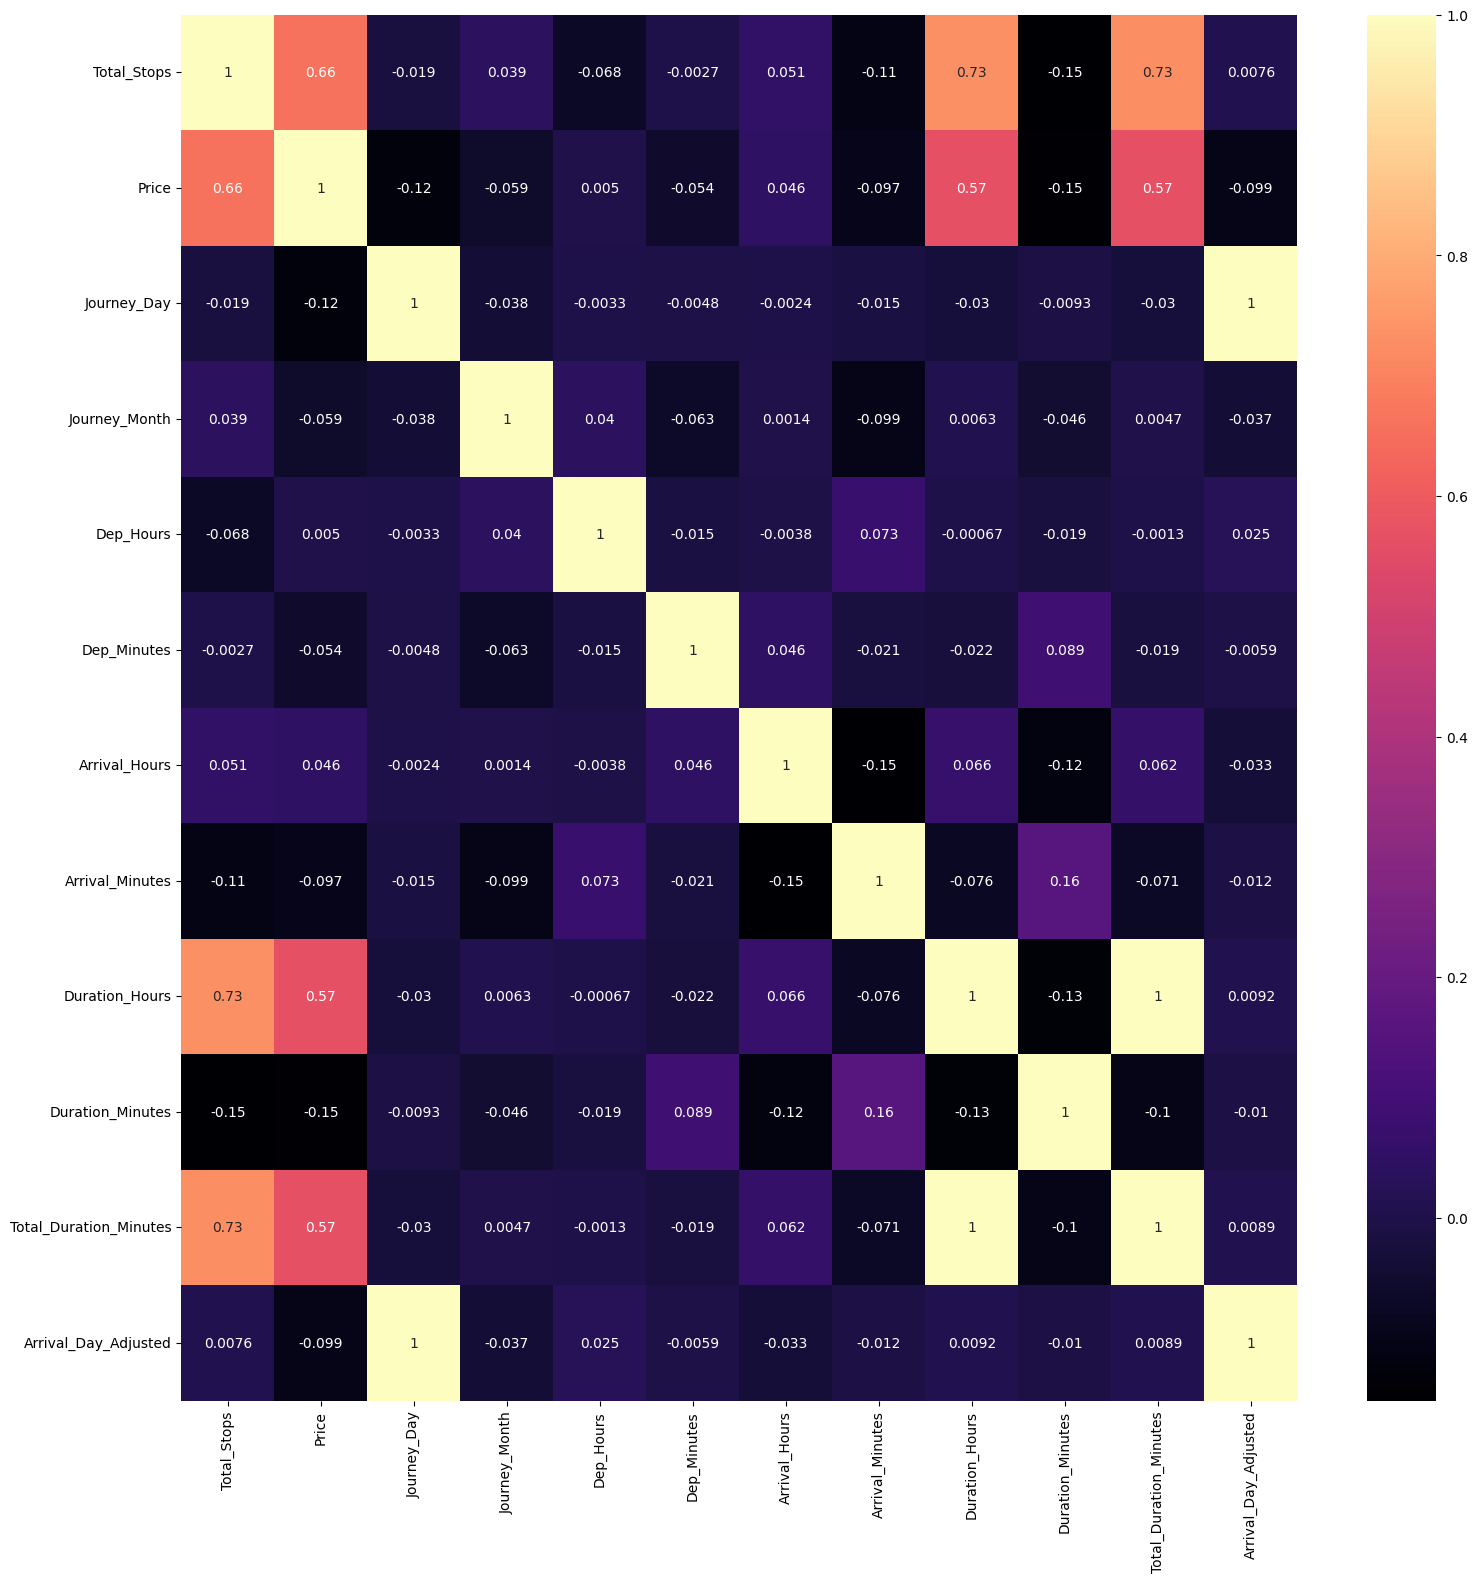

In [85]:

plt.figure(figsize=(18,18))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="magma")
plt.show()

Handling Categorial Data


In [71]:
# One-Hot Encoding for categorical columns ('Airline', 'Source', 'Destination')
df = pd.get_dummies(df , columns=['Airline', 'Source', 'Destination'], drop_first=True)

In [76]:
df.dtypes

,0
Total_Stops,int64
Price,float64
Journey_Day,int32
Journey_Month,int32
Dep_Hours,int32
Dep_Minutes,int32
Arrival_Hours,int32
Arrival_Minutes,int32
Duration_Hours,float64
Duration_Minutes,float64


In [83]:
#import 'train_test_split'
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:

x = df.drop("Price" , axis = 1 )  # Update x with the encoded features

# Now proceed with train_test_split and model fitting
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
RF_reg = RandomForestRegressor()
RF_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [86]:
#predict Y using 'X_test'
Y_pred = RF_reg.predict(X_test)

In [87]:
#for training set
RF_reg.score(X_train, Y_train)

0.9455495013657125

In [88]:
#for testing set
RF_reg.score(X_test, Y_test)

0.7884111586994881

<ipython-input-89-9b2e958f9a7b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




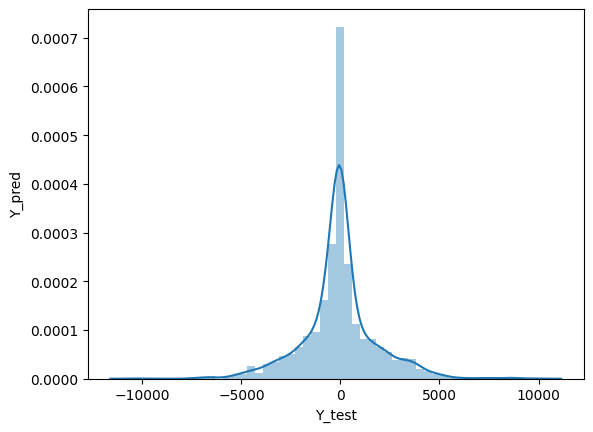

In [89]:
#plot between 'Y_test' and 'Y_pred'
sns.distplot(Y_test-Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [90]:
#import metrics
from sklearn import metrics

# calculate MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 1188.7161648275808
MSE: 3408694.458036879
RMSE: 1846.2650021155898
